In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import traceback
import re
from pandas import Series
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
import warnings
import os
import collections
import pandas.core.algorithms as algos
import scipy.stats.stats as stats
import string

**DATA WRANGLING AND FEATURE ENGINEERING**

In [2]:
demand = pd.read_csv('Demand.csv',encoding = 'ISO-8859-1')
demand.head()

,Country_Region,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,North America,"11,037","11,221","11,724","12,412","12,707","13,275","13,933","14,334","15,328",...,"21,560","21,357","20,944","21,396","21,510","21,994","22,173","22,379","22,977","23,022"
1,Canada,854,872,923,982,"1,051","1,131","1,187","1,267","1,347",...,"2,380","2,409","2,453","2,435","2,405","2,463","2,486","2,421","2,472","2,530"
2,United States,"10,181","10,346","10,799","11,428","11,654","12,142","12,744","13,065","13,979",...,"19,178","18,946","18,488","18,959","19,103","19,529","19,684","19,955","20,503","20,489"
3,Others,2,2,2,2,2,2,2,2,2,...,3,2,2,3,3,3,3,3,3,3
4,Latin America,"1,375","1,457","1,547","1,660","1,795","1,886","2,027","2,158","2,375",...,"8,609","8,881","9,094","9,323","9,373","9,204","9,217","9,198","9,152","9,188"


In [3]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country_Region  61 non-null     object
 1   1960            61 non-null     object
 2   1961            61 non-null     object
 3   1962            61 non-null     object
 4   1963            61 non-null     object
 5   1964            61 non-null     object
 6   1965            61 non-null     object
 7   1966            61 non-null     object
 8   1967            61 non-null     object
 9   1968            61 non-null     object
 10  1969            61 non-null     object
 11  1970            61 non-null     object
 12  1971            61 non-null     object
 13  1972            61 non-null     object
 14  1973            61 non-null     object
 15  1974            61 non-null     object
 16  1975            61 non-null     object
 17  1976            61 non-null     object
 18  1977        

In [4]:
demand =pd.melt(demand,id_vars=['Country_Region'],var_name='Year', value_name='Demand')
demand.head()


,Country_Region,Year,Demand
0,North America,1960,"11,037"
1,Canada,1960,854
2,United States,1960,"10,181"
3,Others,1960,2
4,Latin America,1960,"1,375"


In [5]:
demand['Demand']=demand['Demand'].str.replace(',','')
demand.head()

,Country_Region,Year,Demand
0,North America,1960,11037
1,Canada,1960,854
2,United States,1960,10181
3,Others,1960,2
4,Latin America,1960,1375


In [6]:
demand['Country_Region'].unique()

array(['North America', 'Canada', 'United States', 'Others',
       'Latin America', 'Argentina', 'Brazil', 'Colombia', 'Ecuador',
       'Mexico', 'Venezuela', 'Eastern Europe and Eurasia',
       'Czech Republic', 'Hungary', 'Kazakhstan', 'Poland', 'Romania',
       'Russia', 'Slovakia', 'Ukraine', 'Western Europe', 'France',
       'Germany', 'Italy', 'Netherlands', 'Spain', 'United Kingdom',
       'Middle East', 'IR Iran', 'Iraq', 'Kuwait', 'Qatar',
       'Saudi Arabia', 'Syrian Arab Republic', 'United Arab Emirates',
       'Africa', 'Algeria', 'Angola', 'Congo', 'Egypt',
       'Equatorial Guinea', 'Gabon', 'Libya', 'Nigeria', 'South Africa',
       'Tunisia', 'Asia and Pacific', 'Australia', 'China', 'India',
       'Indonesia', 'Japan', 'New Zealand', 'South Korea', 'Thailand'],
      dtype=object)

In [7]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country_Region  3660 non-null   object
 1   Year            3660 non-null   object
 2   Demand          3660 non-null   object
dtypes: object(3)
memory usage: 85.9+ KB


In [8]:
demand['Demand'] = demand['Demand'].astype(int)
demand['Year'] = demand['Year'].astype(int)
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country_Region  3660 non-null   object
 1   Year            3660 non-null   int32 
 2   Demand          3660 non-null   int32 
dtypes: int32(2), object(1)
memory usage: 57.3+ KB


In [9]:
demand['OilDemandPerYearWorld'] = demand['Demand'].groupby(demand['Year']).transform('mean')
demand.head()

,Country_Region,Year,Demand,OilDemandPerYearWorld
0,North America,1960,11037,701.459016
1,Canada,1960,854,701.459016
2,United States,1960,10181,701.459016
3,Others,1960,2,701.459016
4,Latin America,1960,1375,701.459016


In [10]:
demand['OilDemandPerYearByCountry'] = demand.groupby(['Country_Region','Year'], as_index=False)['Demand'].transform('mean')
demand.head()

,Country_Region,Year,Demand,OilDemandPerYearWorld,OilDemandPerYearByCountry
0,North America,1960,11037,701.459016,11037.000000
1,Canada,1960,854,701.459016,854.000000
2,United States,1960,10181,701.459016,10181.000000
3,Others,1960,2,701.459016,338.142857
4,Latin America,1960,1375,701.459016,1375.000000


In [11]:
demand['OilDemandPerYearWorld'] = round(demand['OilDemandPerYearWorld'],2)

In [12]:
demand['OilDemandPerYearByCountry'] = round(demand['OilDemandPerYearByCountry'],2)
demand.head()

,Country_Region,Year,Demand,OilDemandPerYearWorld,OilDemandPerYearByCountry
0,North America,1960,11037,701.46,11037.00
1,Canada,1960,854,701.46,854.00
2,United States,1960,10181,701.46,10181.00
3,Others,1960,2,701.46,338.14
4,Latin America,1960,1375,701.46,1375.00


In [13]:
presidents = pd.read_csv('us_presidents.csv',encoding = 'ISO-8859-1')
presidents.head()

,Unnamed: 0,S.No.,start,end,president,prior,party,vice
0,0,1,"April 30, 1789","March 4, 1797",George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,1,2,"March 4, 1797","March 4, 1801",John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson
2,2,3,"March 4, 1801","March 4, 1809",Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,3,4,"March 4, 1809","March 4, 1817",James Madison,5th United States Secretary of State (1801â...,Democratic- Republican,George Clinton
4,4,5,"March 4, 1817","March 4, 1825",James Monroe,7th United States Secretary of State (1811â...,Democratic- Republican,Daniel D. Tompkins


In [14]:
presidents.isnull().values.any()

True

In [15]:
missing = pd.concat([presidents.isnull().sum(), 100 * presidents.isnull().mean()], axis=1)
missing2 = missing.columns=['count', '%']
missing.sort_values(by=missing2, ascending=False)

,count,%
end,1,2.222222
Unnamed: 0,0,0.000000
S.No.,0,0.000000
start,0,0.000000
president,0,0.000000
prior,0,0.000000
party,0,0.000000
vice,0,0.000000


In [16]:
presidents['end'].isnull().groupby(presidents['president']).sum().to_dict()

{'Abraham Lincoln': 0,
 'Andrew Jackson': 0,
 'Andrew Johnson': 0,
 'Barack Obama': 1,
 'Benjamin Harrison': 0,
 'Bill Clinton': 0,
 'Calvin Coolidge': 0,
 'Chester A. Arthur': 0,
 'Donald Trump': 0,
 'Dwight D. Eisenhower': 0,
 'Franklin D. Roosevelt': 0,
 'Franklin Pierce': 0,
 'George H. W. Bush': 0,
 'George W. Bush': 0,
 'George Washington': 0,
 'Gerald Ford': 0,
 'Grover Cleveland': 0,
 'Harry S. Truman': 0,
 'Herbert Hoover': 0,
 'James A. Garfield': 0,
 'James Buchanan': 0,
 'James K. Polk': 0,
 'James Madison': 0,
 'James Monroe': 0,
 'Jimmy Carter': 0,
 'John Adams': 0,
 'John F. Kennedy': 0,
 'John Quincy Adams': 0,
 'John Tyler': 0,
 'Lyndon B. Johnson': 0,
 'Martin Van Buren': 0,
 'Millard Fillmore': 0,
 'Richard Nixon': 0,
 'Ronald Reagan': 0,
 'Rutherford B. Hayes': 0,
 'Theodore Roosevelt': 0,
 'Thomas Jefferson': 0,
 'Ulysses S. Grant': 0,
 'Warren G. Harding': 0,
 'William Henry Harrison': 0,
 'William Howard Taft': 0,
 'William McKinley': 0,
 'Woodrow Wilson': 0,
 'Z

In [17]:
presidents['end'].to_dict()

{0: 'March 4, 1797',
 1: 'March 4, 1801',
 2: 'March 4, 1809',
 3: 'March 4, 1817',
 4: 'March 4, 1825',
 5: 'March 4, 1829',
 6: 'March 4, 1837',
 7: 'March 4, 1841',
 8: 'April 4, 1841',
 9: 'March 4, 1845',
 10: 'March 4, 1849',
 11: 'July 9, 1850',
 12: 'March 4, 1853',
 13: 'March 4, 1857',
 14: 'March 4, 1861',
 15: 'April 15, 1865',
 16: 'March 4, 1869',
 17: 'March 4, 1877',
 18: 'March 4, 1881',
 19: 'September 19, 1881',
 20: 'March 4, 1885',
 21: 'March 4, 1889',
 22: 'March 4, 1893',
 23: 'March 4, 1897',
 24: 'September 14, 1901',
 25: 'March 4, 1909',
 26: 'March 4, 1913',
 27: 'March 4, 1921',
 28: 'August 2, 1923',
 29: 'March 4, 1929',
 30: 'March 4, 1933',
 31: 'January 20, 1941',
 32: 'January 20, 1953',
 33: 'January 20, 1961',
 34: 'November 22, 1963',
 35: 'January 20, 1969',
 36: 'August 9, 1974',
 37: 'January 20, 1977',
 38: 'January 20, 1981',
 39: 'January 20, 1989',
 40: 'January 20, 1993',
 41: 'January 20, 2001',
 42: 'January 20, 2009',
 43: nan,
 44: '--

In [18]:
dash = np.where(presidents['end']== '--', presidents['president'], 0)
dash

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       'Donald Trump'], dtype=object)

In [19]:
empty = np.where(presidents['end'].isnull(), presidents['president'], 0)
empty

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       'Barack Obama', 0], dtype=object)

In [20]:
presidents['end'] = presidents['end'].replace(['--'],'January 20, 2021')

In [21]:
presidents['end'] = presidents.end.replace(np.NaN, 'January 20, 2017')

In [22]:
presidents.tail()

,Unnamed: 0,S.No.,start,end,president,prior,party,vice
40,40,41,"January 20, 1989","January 20, 1993",George H. W. Bush,43rd Vice President of the United States,Republican,Dan Quayle
41,41,42,"January 20, 1993","January 20, 2001",Bill Clinton,40th & 42nd Governor of Arkansas (1979â19...,Democratic,Al Gore
42,42,43,"January 20, 2001","January 20, 2009",George W. Bush,46th Governor of Texas ( 1995â2000 ),Republican,Dick Cheney
43,43,44,"January 20, 2009","January 20, 2017",Barack Obama,U.S. Senator ( Class 3 ) from Illinois ...,Democratic,Joe Biden
44,44,45,"January 20, 2017","January 20, 2021",Donald Trump,Chairman of The Trump Organization ( 1971â...,Republican,Mike Pence


In [23]:
party = presidents[['start', 'end', 'party']].copy()
party.head()

,start,end,party
0,"April 30, 1789","March 4, 1797",Nonpartisan [13]
1,"March 4, 1797","March 4, 1801",Federalist
2,"March 4, 1801","March 4, 1809",Democratic- Republican
3,"March 4, 1809","March 4, 1817",Democratic- Republican
4,"March 4, 1817","March 4, 1825",Democratic- Republican


In [24]:
party['party'].unique()

array(['Nonpartisan   [13]', 'Federalist', 'Democratic-  Republican',
       'Democratic', 'Whig',
       'Whig   April 4, 1841  â\x80\x93  September 13, 1841',
       'Republican   ( National Union )   [i]',
       'National Union   [i]   ( Democratic )   [j]', 'Republican'],
      dtype=object)

In [25]:
def create_party(party):
    if party == 'Democratic-  Republican': political_party = 'Dem/Rep'
    elif party == 'Democratic': political_party = 'Dem'
    elif party == 'Republican': political_party = 'Rep'
    else: political_party = 'Other'
    return(political_party)

party['political_party'] = party['party'].apply(create_party)

party.head()

,start,end,party,political_party
0,"April 30, 1789","March 4, 1797",Nonpartisan [13],Other
1,"March 4, 1797","March 4, 1801",Federalist,Other
2,"March 4, 1801","March 4, 1809",Democratic- Republican,Dem/Rep
3,"March 4, 1809","March 4, 1817",Democratic- Republican,Dem/Rep
4,"March 4, 1817","March 4, 1825",Democratic- Republican,Dem/Rep


In [26]:
party.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   start            45 non-null     object
 1   end              45 non-null     object
 2   party            45 non-null     object
 3   political_party  45 non-null     object
dtypes: object(4)
memory usage: 1.5+ KB


In [27]:
party['start'] = party['start'].str.replace(',', '')
party['start'].head()

0    April 30 1789
1     March 4 1797
2     March 4 1801
3     March 4 1809
4     March 4 1817
Name: start, dtype: object

In [28]:
party['start'] = pd.to_datetime(party['start'], format= '%B %d %Y')
party['start'].head()

0   1789-04-30
1   1797-03-04
2   1801-03-04
3   1809-03-04
4   1817-03-04
Name: start, dtype: datetime64[ns]

In [29]:
party.isnull().values.any()

False

In [30]:
party['Start_Month']=party['start'].dt.month
party['Start_Year']=party['start'].dt.year
party['Start_WeekDay']=party['start'].dt.dayofweek
party['Start_MonthDay']=party['start'].dt.day
party['Start_Week']=party['start'].dt.isocalendar().week

In [31]:
party.head()

,start,end,party,political_party,Start_Month,Start_Year,Start_WeekDay,Start_MonthDay,Start_Week
0,1789-04-30,"March 4, 1797",Nonpartisan [13],Other,4,1789,3,30,18
1,1797-03-04,"March 4, 1801",Federalist,Other,3,1797,5,4,9
2,1801-03-04,"March 4, 1809",Democratic- Republican,Dem/Rep,3,1801,2,4,10
3,1809-03-04,"March 4, 1817",Democratic- Republican,Dem/Rep,3,1809,5,4,9
4,1817-03-04,"March 4, 1825",Democratic- Republican,Dem/Rep,3,1817,1,4,10


In [32]:
party['end'] = party['end'].str.replace(',', '')
party['end'] = pd.to_datetime(party['end'], format= '%B %d %Y')
party['end'].head()

0   1797-03-04
1   1801-03-04
2   1809-03-04
3   1817-03-04
4   1825-03-04
Name: end, dtype: datetime64[ns]

In [33]:
party['End_Month']=party['end'].dt.month
party['End_Year']=party['end'].dt.year
party['End_WeekDay']=party['end'].dt.dayofweek
party['End_MonthDay']=party['end'].dt.day
party['End_Week']=party['end'].dt.isocalendar().week

In [34]:
del party['start']

In [35]:
del party['end']

In [36]:
del party['party']

In [37]:
party.head()

,political_party,Start_Month,Start_Year,Start_WeekDay,Start_MonthDay,Start_Week,End_Month,End_Year,End_WeekDay,End_MonthDay,End_Week
0,Other,4,1789,3,30,18,3,1797,5,4,9
1,Other,3,1797,5,4,9,3,1801,2,4,10
2,Dem/Rep,3,1801,2,4,10,3,1809,5,4,9
3,Dem/Rep,3,1809,5,4,9,3,1817,1,4,10
4,Dem/Rep,3,1817,1,4,10,3,1825,4,4,9


In [38]:
party.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   political_party  45 non-null     object
 1   Start_Month      45 non-null     int64 
 2   Start_Year       45 non-null     int64 
 3   Start_WeekDay    45 non-null     int64 
 4   Start_MonthDay   45 non-null     int64 
 5   Start_Week       45 non-null     UInt32
 6   End_Month        45 non-null     int64 
 7   End_Year         45 non-null     int64 
 8   End_WeekDay      45 non-null     int64 
 9   End_MonthDay     45 non-null     int64 
 10  End_Week         45 non-null     UInt32
dtypes: UInt32(2), int64(8), object(1)
memory usage: 3.7+ KB


In [39]:
gdp = pd.read_csv('gdp_csv.csv',encoding = 'ISO-8859-1')
gdp.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [40]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11507 entries, 0 to 11506
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  11507 non-null  object 
 1   Country Code  11507 non-null  object 
 2   Year          11507 non-null  int64  
 3   Value         11507 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 359.7+ KB


In [41]:
gdp['Country Name'].unique()

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & No

In [42]:
oil_price = pd.read_csv('BrentOilPrices.csv',encoding = 'ISO-8859-1')
oil_price.head()

,Date,Price
0,5/20/1987,18.63
1,5/21/1987,18.45
2,5/22/1987,18.55
3,5/25/1987,18.60
4,5/26/1987,18.63


In [43]:
oil_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8554 entries, 0 to 8553
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8554 non-null   object 
 1   Price   8554 non-null   float64
dtypes: float64(1), object(1)
memory usage: 133.8+ KB


In [44]:
oil_price['Date'] = pd.to_datetime(oil_price['Date'])
oil_price.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [45]:
oil_price['Price_Month']=oil_price['Date'].dt.month
oil_price['Price_Year']=oil_price['Date'].dt.year
oil_price['Price_WeekDay']=oil_price['Date'].dt.dayofweek
oil_price['Price_MonthDay']=oil_price['Date'].dt.day
oil_price['Price_Week']=oil_price['Date'].dt.isocalendar().week

In [46]:
oil_price.head()

,Date,Price,Price_Month,Price_Year,Price_WeekDay,Price_MonthDay,Price_Week
0,1987-05-20,18.63,5,1987,2,20,21
1,1987-05-21,18.45,5,1987,3,21,21
2,1987-05-22,18.55,5,1987,4,22,21
3,1987-05-25,18.60,5,1987,0,25,22
4,1987-05-26,18.63,5,1987,1,26,22


In [47]:
oil_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8554 entries, 0 to 8553
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            8554 non-null   datetime64[ns]
 1   Price           8554 non-null   float64       
 2   Price_Month     8554 non-null   int64         
 3   Price_Year      8554 non-null   int64         
 4   Price_WeekDay   8554 non-null   int64         
 5   Price_MonthDay  8554 non-null   int64         
 6   Price_Week      8554 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(1), int64(4)
memory usage: 442.9 KB


In [48]:
oil_price['Oil $ per Year'] = oil_price['Price'].groupby(oil_price['Price_Year']).transform('mean')
oil_price['Max $ per Year'] = oil_price['Price'].groupby(oil_price['Price_Year']).transform('max')
oil_price['Min $ per Year'] = oil_price['Price'].groupby(oil_price['Price_Year']).transform('min')
oil_price.head()

,Date,Price,Price_Month,Price_Year,Price_WeekDay,Price_MonthDay,Price_Week,Oil $ per Year,Max $ per Year,Min $ per Year
0,1987-05-20,18.63,5,1987,2,20,21,18.525813,20.95,15.03
1,1987-05-21,18.45,5,1987,3,21,21,18.525813,20.95,15.03
2,1987-05-22,18.55,5,1987,4,22,21,18.525813,20.95,15.03
3,1987-05-25,18.60,5,1987,0,25,22,18.525813,20.95,15.03
4,1987-05-26,18.63,5,1987,1,26,22,18.525813,20.95,15.03


In [49]:
demand.columns

Index(['Country_Region', 'Year', 'Demand', 'OilDemandPerYearWorld',
       'OilDemandPerYearByCountry'],
      dtype='object')

In [50]:
demand['Year'].min()

1960

In [51]:
demand['Year'].max()

2019

In [52]:
party.columns

Index(['political_party', 'Start_Month', 'Start_Year', 'Start_WeekDay',
       'Start_MonthDay', 'Start_Week', 'End_Month', 'End_Year', 'End_WeekDay',
       'End_MonthDay', 'End_Week'],
      dtype='object')

In [53]:
party.Start_Year.min()

1789

In [54]:
party.End_Year.max()

2021

In [55]:
party.head()

,political_party,Start_Month,Start_Year,Start_WeekDay,Start_MonthDay,Start_Week,End_Month,End_Year,End_WeekDay,End_MonthDay,End_Week
0,Other,4,1789,3,30,18,3,1797,5,4,9
1,Other,3,1797,5,4,9,3,1801,2,4,10
2,Dem/Rep,3,1801,2,4,10,3,1809,5,4,9
3,Dem/Rep,3,1809,5,4,9,3,1817,1,4,10
4,Dem/Rep,3,1817,1,4,10,3,1825,4,4,9


In [56]:
compression_opts = dict(method='zip',
                        archive_name='party.csv')  
party.to_csv('party.zip', index=False,
          compression=compression_opts)  

In [57]:
political = pd.read_csv('party_years.csv',encoding = 'ISO-8859-1')
political.head()

,Start_Year,Year
0,1789,1789
1,1789,1790
2,1789,1791
3,1789,1792
4,1789,1793


In [58]:
oil_price.columns

Index(['Date', 'Price', 'Price_Month', 'Price_Year', 'Price_WeekDay',
       'Price_MonthDay', 'Price_Week', 'Oil $ per Year', 'Max $ per Year',
       'Min $ per Year'],
      dtype='object')

In [59]:
oil_price.Price_Year.min()

1987

In [60]:
oil_price.Price_Year.max()

2021

In [61]:
gdp.columns

Index(['Country Name', 'Country Code', 'Year', 'Value'], dtype='object')

In [62]:
del gdp['Country Code']

In [63]:
gdp.Year.min()

1960

In [64]:
gdp.Year.max()

2016

In [65]:
political_party = party.merge(political, on='Start_Year')

political_party.head()


,political_party,Start_Month,Start_Year,Start_WeekDay,Start_MonthDay,Start_Week,End_Month,End_Year,End_WeekDay,End_MonthDay,End_Week,Year
0,Other,4,1789,3,30,18,3,1797,5,4,9,1789
1,Other,4,1789,3,30,18,3,1797,5,4,9,1790
2,Other,4,1789,3,30,18,3,1797,5,4,9,1791
3,Other,4,1789,3,30,18,3,1797,5,4,9,1792
4,Other,4,1789,3,30,18,3,1797,5,4,9,1793


In [66]:
political_party.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   political_party  240 non-null    object
 1   Start_Month      240 non-null    int64 
 2   Start_Year       240 non-null    int64 
 3   Start_WeekDay    240 non-null    int64 
 4   Start_MonthDay   240 non-null    int64 
 5   Start_Week       240 non-null    UInt32
 6   End_Month        240 non-null    int64 
 7   End_Year         240 non-null    int64 
 8   End_WeekDay      240 non-null    int64 
 9   End_MonthDay     240 non-null    int64 
 10  End_Week         240 non-null    UInt32
 11  Year             240 non-null    int64 
dtypes: UInt32(2), int64(9), object(1)
memory usage: 23.0+ KB


In [67]:
gdp_demand = pd.merge(gdp, demand, left_on=['Country Name','Year'], right_on = ['Country_Region','Year'])
gdp_demand.head(20)

,Country Name,Year,Value,Country_Region,Demand,OilDemandPerYearWorld,OilDemandPerYearByCountry
0,North America,1960,5.844779e+11,North America,11037,701.46,11037.0
1,North America,1961,6.041572e+11,North America,11221,743.56,11221.0
2,North America,1962,6.471730e+11,North America,11724,806.20,11724.0
3,North America,1963,6.833535e+11,North America,12412,877.77,12412.0
4,North America,1964,7.347905e+11,North America,12707,947.11,12707.0
5,North America,1965,7.977239e+11,North America,13275,1017.93,13275.0
6,North America,1966,8.754928e+11,North America,13933,1098.85,13933.0
7,North America,1967,9.266239e+11,North America,14334,1168.56,14334.0
8,North America,1968,1.013409e+12,North America,15328,1272.18,15328.0
9,North America,1969,1.097952e+12,North America,16181,1385.07,16181.0


In [68]:
gdp_demand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2010 entries, 0 to 2009
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country Name               2010 non-null   object 
 1   Year                       2010 non-null   int64  
 2   Value                      2010 non-null   float64
 3   Country_Region             2010 non-null   object 
 4   Demand                     2010 non-null   int32  
 5   OilDemandPerYearWorld      2010 non-null   float64
 6   OilDemandPerYearByCountry  2010 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(2)
memory usage: 117.8+ KB


In [69]:
gdp_party_demand = gdp_demand.merge(political_party, on='Year')

gdp_party_demand.head()

,Country Name,Year,Value,Country_Region,Demand,OilDemandPerYearWorld,OilDemandPerYearByCountry,political_party,Start_Month,Start_Year,Start_WeekDay,Start_MonthDay,Start_Week,End_Month,End_Year,End_WeekDay,End_MonthDay,End_Week
0,North America,1960,5.844779e+11,North America,11037,701.46,11037.0,Rep,1,1953,1,20,4,1,1961,4,20,3
1,Algeria,1960,2.723649e+09,Algeria,23,701.46,23.0,Rep,1,1953,1,20,4,1,1961,4,20,3
2,Australia,1960,1.859335e+10,Australia,269,701.46,269.0,Rep,1,1953,1,20,4,1,1961,4,20,3
3,Brazil,1960,1.516557e+10,Brazil,270,701.46,270.0,Rep,1,1953,1,20,4,1,1961,4,20,3
4,Canada,1960,4.109345e+10,Canada,854,701.46,854.0,Rep,1,1953,1,20,4,1,1961,4,20,3


In [70]:
gdp_party_demand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2010 entries, 0 to 2009
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country Name               2010 non-null   object 
 1   Year                       2010 non-null   int64  
 2   Value                      2010 non-null   float64
 3   Country_Region             2010 non-null   object 
 4   Demand                     2010 non-null   int32  
 5   OilDemandPerYearWorld      2010 non-null   float64
 6   OilDemandPerYearByCountry  2010 non-null   float64
 7   political_party            2010 non-null   object 
 8   Start_Month                2010 non-null   int64  
 9   Start_Year                 2010 non-null   int64  
 10  Start_WeekDay              2010 non-null   int64  
 11  Start_MonthDay             2010 non-null   int64  
 12  Start_Week                 2010 non-null   UInt32 
 13  End_Month                  2010 non-null   int64

In [71]:
avg_price = oil_price[['Price_Year', 'Price','Oil $ per Year', 'Max $ per Year', 'Min $ per Year']].copy()
avg_price.head()

,Price_Year,Price,Oil $ per Year,Max $ per Year,Min $ per Year
0,1987,18.63,18.525813,20.95,15.03
1,1987,18.45,18.525813,20.95,15.03
2,1987,18.55,18.525813,20.95,15.03
3,1987,18.60,18.525813,20.95,15.03
4,1987,18.63,18.525813,20.95,15.03


In [72]:
avg_price.drop_duplicates()

,Price_Year,Price,Oil $ per Year,Max $ per Year,Min $ per Year
0,1987,18.63,18.525813,20.95,15.03
1,1987,18.45,18.525813,20.95,15.03
2,1987,18.55,18.525813,20.95,15.03
3,1987,18.60,18.525813,20.95,15.03
7,1987,18.58,18.525813,20.95,15.03
...,...,...,...,...,...
8549,2021,55.38,54.689375,55.98,50.37
8550,2021,55.66,54.689375,55.98,50.37
8551,2021,55.68,54.689375,55.98,50.37
8552,2021,55.22,54.689375,55.98,50.37


In [73]:
df_avg = pd.merge(gdp_party_demand, avg_price, how='left', left_on='Year', right_on='Price_Year')
df_avg.head()

,Country Name,Year,Value,Country_Region,Demand,OilDemandPerYearWorld,OilDemandPerYearByCountry,political_party,Start_Month,Start_Year,...,End_Month,End_Year,End_WeekDay,End_MonthDay,End_Week,Price_Year,Price,Oil $ per Year,Max $ per Year,Min $ per Year
0,North America,1960,5.844779e+11,North America,11037,701.46,11037.0,Rep,1,1953,...,1,1961,4,20,3,NaN,NaN,NaN,NaN,NaN
1,Algeria,1960,2.723649e+09,Algeria,23,701.46,23.0,Rep,1,1953,...,1,1961,4,20,3,NaN,NaN,NaN,NaN,NaN
2,Australia,1960,1.859335e+10,Australia,269,701.46,269.0,Rep,1,1953,...,1,1961,4,20,3,NaN,NaN,NaN,NaN,NaN
3,Brazil,1960,1.516557e+10,Brazil,270,701.46,270.0,Rep,1,1953,...,1,1961,4,20,3,NaN,NaN,NaN,NaN,NaN
4,Canada,1960,4.109345e+10,Canada,854,701.46,854.0,Rep,1,1953,...,1,1961,4,20,3,NaN,NaN,NaN,NaN,NaN


In [74]:
df_avg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298545 entries, 0 to 298544
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Country Name               298545 non-null  object 
 1   Year                       298545 non-null  int64  
 2   Value                      298545 non-null  float64
 3   Country_Region             298545 non-null  object 
 4   Demand                     298545 non-null  int32  
 5   OilDemandPerYearWorld      298545 non-null  float64
 6   OilDemandPerYearByCountry  298545 non-null  float64
 7   political_party            298545 non-null  object 
 8   Start_Month                298545 non-null  int64  
 9   Start_Year                 298545 non-null  int64  
 10  Start_WeekDay              298545 non-null  int64  
 11  Start_MonthDay             298545 non-null  int64  
 12  Start_Week                 298545 non-null  UInt32 
 13  End_Month                  29

In [75]:
del df_avg['Country Name']

In [76]:
df_avg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298545 entries, 0 to 298544
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Year                       298545 non-null  int64  
 1   Value                      298545 non-null  float64
 2   Country_Region             298545 non-null  object 
 3   Demand                     298545 non-null  int32  
 4   OilDemandPerYearWorld      298545 non-null  float64
 5   OilDemandPerYearByCountry  298545 non-null  float64
 6   political_party            298545 non-null  object 
 7   Start_Month                298545 non-null  int64  
 8   Start_Year                 298545 non-null  int64  
 9   Start_WeekDay              298545 non-null  int64  
 10  Start_MonthDay             298545 non-null  int64  
 11  Start_Week                 298545 non-null  UInt32 
 12  End_Month                  298545 non-null  int64  
 13  End_Year                   29

In [77]:
df_avg.head(40)
                    

,Year,Value,Country_Region,Demand,OilDemandPerYearWorld,OilDemandPerYearByCountry,political_party,Start_Month,Start_Year,Start_WeekDay,...,End_Month,End_Year,End_WeekDay,End_MonthDay,End_Week,Price_Year,Price,Oil $ per Year,Max $ per Year,Min $ per Year
0,1960,5.844779e+11,North America,11037,701.46,11037.0,Rep,1,1953,1,...,1,1961,4,20,3,NaN,NaN,NaN,NaN,NaN
1,1960,2.723649e+09,Algeria,23,701.46,23.0,Rep,1,1953,1,...,1,1961,4,20,3,NaN,NaN,NaN,NaN,NaN
2,1960,1.859335e+10,Australia,269,701.46,269.0,Rep,1,1953,1,...,1,1961,4,20,3,NaN,NaN,NaN,NaN,NaN
3,1960,1.516557e+10,Brazil,270,701.46,270.0,Rep,1,1953,1,...,1,1961,4,20,3,NaN,NaN,NaN,NaN,NaN
4,1960,4.109345e+10,Canada,854,701.46,854.0,Rep,1,1953,1,...,1,1961,4,20,3,NaN,NaN,NaN,NaN,NaN
5,1960,5.971647e+10,China,123,701.46,123.0,Rep,1,1953,1,...,1,1961,4,20,3,NaN,NaN,NaN,NaN,NaN
6,1960,4.040948e+09,Colombia,100,701.46,100.0,Rep,1,1953,1,...,1,1961,4,20,3,NaN,NaN,NaN,NaN,NaN
7,1960,1.010325e+09,Ecuador,13,701.46,13.0,Rep,1,1953,1,...,1,1961,4,20,3,NaN,NaN,NaN,NaN,NaN
8,1960,6.265147e+10,France,561,701.46,561.0,Rep,1,1953,1,...,1,1961,4,20,3,NaN,NaN,NaN,NaN,NaN
9,1960,1.414690e+08,Gabon,3,701.46,3.0,Rep,1,1953,1,...,1,1961,4,20,3,NaN,NaN,NaN,NaN,NaN


In [78]:
df_avg['Price_Year'].min()

1987.0

In [79]:
del df_avg['Price_Year']

In [80]:
df_avg.dropna(inplace=True)

In [81]:
df_avg.head()

,Year,Value,Country_Region,Demand,OilDemandPerYearWorld,OilDemandPerYearByCountry,political_party,Start_Month,Start_Year,Start_WeekDay,...,Start_Week,End_Month,End_Year,End_WeekDay,End_MonthDay,End_Week,Price,Oil $ per Year,Max $ per Year,Min $ per Year
823,1987,5.302830e+12,North America,18352,2076.41,18352.0,Rep,1,1981,1,...,4,1,1989,4,20,3,18.63,18.525813,20.95,15.03
824,1987,5.302830e+12,North America,18352,2076.41,18352.0,Rep,1,1981,1,...,4,1,1989,4,20,3,18.45,18.525813,20.95,15.03
825,1987,5.302830e+12,North America,18352,2076.41,18352.0,Rep,1,1981,1,...,4,1,1989,4,20,3,18.55,18.525813,20.95,15.03
826,1987,5.302830e+12,North America,18352,2076.41,18352.0,Rep,1,1981,1,...,4,1,1989,4,20,3,18.60,18.525813,20.95,15.03
827,1987,5.302830e+12,North America,18352,2076.41,18352.0,Rep,1,1981,1,...,4,1,1989,4,20,3,18.63,18.525813,20.95,15.03


In [82]:
df_avg.reset_index(inplace=True)
df_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297722 entries, 0 to 297721
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      297722 non-null  int64  
 1   Year                       297722 non-null  int64  
 2   Value                      297722 non-null  float64
 3   Country_Region             297722 non-null  object 
 4   Demand                     297722 non-null  int32  
 5   OilDemandPerYearWorld      297722 non-null  float64
 6   OilDemandPerYearByCountry  297722 non-null  float64
 7   political_party            297722 non-null  object 
 8   Start_Month                297722 non-null  int64  
 9   Start_Year                 297722 non-null  int64  
 10  Start_WeekDay              297722 non-null  int64  
 11  Start_MonthDay             297722 non-null  int64  
 12  Start_Week                 297722 non-null  UInt32 
 13  End_Month                  29

In [83]:
df_avg.head()

,index,Year,Value,Country_Region,Demand,OilDemandPerYearWorld,OilDemandPerYearByCountry,political_party,Start_Month,Start_Year,...,Start_Week,End_Month,End_Year,End_WeekDay,End_MonthDay,End_Week,Price,Oil $ per Year,Max $ per Year,Min $ per Year
0,823,1987,5.302830e+12,North America,18352,2076.41,18352.0,Rep,1,1981,...,4,1,1989,4,20,3,18.63,18.525813,20.95,15.03
1,824,1987,5.302830e+12,North America,18352,2076.41,18352.0,Rep,1,1981,...,4,1,1989,4,20,3,18.45,18.525813,20.95,15.03
2,825,1987,5.302830e+12,North America,18352,2076.41,18352.0,Rep,1,1981,...,4,1,1989,4,20,3,18.55,18.525813,20.95,15.03
3,826,1987,5.302830e+12,North America,18352,2076.41,18352.0,Rep,1,1981,...,4,1,1989,4,20,3,18.60,18.525813,20.95,15.03
4,827,1987,5.302830e+12,North America,18352,2076.41,18352.0,Rep,1,1981,...,4,1,1989,4,20,3,18.63,18.525813,20.95,15.03


In [84]:
opec = pd.read_csv('OPEC Countries.csv',encoding = 'ISO-8859-1')
opec.head()

,OPEC Country
0,Algeria
1,Angola
2,Equatorial Guinea
3,Gabon
4,"Iran, Islamic Rep."


In [85]:
df_avg = pd.merge(df_avg, opec, how='left', left_on='Country_Region', right_on='OPEC Country')
df_avg.head()

,index,Year,Value,Country_Region,Demand,OilDemandPerYearWorld,OilDemandPerYearByCountry,political_party,Start_Month,Start_Year,...,End_Month,End_Year,End_WeekDay,End_MonthDay,End_Week,Price,Oil $ per Year,Max $ per Year,Min $ per Year,OPEC Country
0,823,1987,5.302830e+12,North America,18352,2076.41,18352.0,Rep,1,1981,...,1,1989,4,20,3,18.63,18.525813,20.95,15.03,NaN
1,824,1987,5.302830e+12,North America,18352,2076.41,18352.0,Rep,1,1981,...,1,1989,4,20,3,18.45,18.525813,20.95,15.03,NaN
2,825,1987,5.302830e+12,North America,18352,2076.41,18352.0,Rep,1,1981,...,1,1989,4,20,3,18.55,18.525813,20.95,15.03,NaN
3,826,1987,5.302830e+12,North America,18352,2076.41,18352.0,Rep,1,1981,...,1,1989,4,20,3,18.60,18.525813,20.95,15.03,NaN
4,827,1987,5.302830e+12,North America,18352,2076.41,18352.0,Rep,1,1981,...,1,1989,4,20,3,18.63,18.525813,20.95,15.03,NaN


In [86]:
df_avg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297722 entries, 0 to 297721
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      297722 non-null  int64  
 1   Year                       297722 non-null  int64  
 2   Value                      297722 non-null  float64
 3   Country_Region             297722 non-null  object 
 4   Demand                     297722 non-null  int32  
 5   OilDemandPerYearWorld      297722 non-null  float64
 6   OilDemandPerYearByCountry  297722 non-null  float64
 7   political_party            297722 non-null  object 
 8   Start_Month                297722 non-null  int64  
 9   Start_Year                 297722 non-null  int64  
 10  Start_WeekDay              297722 non-null  int64  
 11  Start_MonthDay             297722 non-null  int64  
 12  Start_Week                 297722 non-null  UInt32 
 13  End_Month                  29

In [87]:
df_avg['OPEC_Country'] = np.where(df_avg['Country_Region']==df_avg['OPEC Country'],1,0)
df_avg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297722 entries, 0 to 297721
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      297722 non-null  int64  
 1   Year                       297722 non-null  int64  
 2   Value                      297722 non-null  float64
 3   Country_Region             297722 non-null  object 
 4   Demand                     297722 non-null  int32  
 5   OilDemandPerYearWorld      297722 non-null  float64
 6   OilDemandPerYearByCountry  297722 non-null  float64
 7   political_party            297722 non-null  object 
 8   Start_Month                297722 non-null  int64  
 9   Start_Year                 297722 non-null  int64  
 10  Start_WeekDay              297722 non-null  int64  
 11  Start_MonthDay             297722 non-null  int64  
 12  Start_Week                 297722 non-null  UInt32 
 13  End_Month                  29

In [88]:
del df_avg['OPEC Country']
df_avg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297722 entries, 0 to 297721
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      297722 non-null  int64  
 1   Year                       297722 non-null  int64  
 2   Value                      297722 non-null  float64
 3   Country_Region             297722 non-null  object 
 4   Demand                     297722 non-null  int32  
 5   OilDemandPerYearWorld      297722 non-null  float64
 6   OilDemandPerYearByCountry  297722 non-null  float64
 7   political_party            297722 non-null  object 
 8   Start_Month                297722 non-null  int64  
 9   Start_Year                 297722 non-null  int64  
 10  Start_WeekDay              297722 non-null  int64  
 11  Start_MonthDay             297722 non-null  int64  
 12  Start_Week                 297722 non-null  UInt32 
 13  End_Month                  29

In [89]:
df_avg.head()

,index,Year,Value,Country_Region,Demand,OilDemandPerYearWorld,OilDemandPerYearByCountry,political_party,Start_Month,Start_Year,...,End_Month,End_Year,End_WeekDay,End_MonthDay,End_Week,Price,Oil $ per Year,Max $ per Year,Min $ per Year,OPEC_Country
0,823,1987,5.302830e+12,North America,18352,2076.41,18352.0,Rep,1,1981,...,1,1989,4,20,3,18.63,18.525813,20.95,15.03,0
1,824,1987,5.302830e+12,North America,18352,2076.41,18352.0,Rep,1,1981,...,1,1989,4,20,3,18.45,18.525813,20.95,15.03,0
2,825,1987,5.302830e+12,North America,18352,2076.41,18352.0,Rep,1,1981,...,1,1989,4,20,3,18.55,18.525813,20.95,15.03,0
3,826,1987,5.302830e+12,North America,18352,2076.41,18352.0,Rep,1,1981,...,1,1989,4,20,3,18.60,18.525813,20.95,15.03,0
4,827,1987,5.302830e+12,North America,18352,2076.41,18352.0,Rep,1,1981,...,1,1989,4,20,3,18.63,18.525813,20.95,15.03,0


In [90]:
df1 = pd.get_dummies(df_avg, columns=['Country_Region','political_party'])

df1.head()

,index,Year,Value,Demand,OilDemandPerYearWorld,OilDemandPerYearByCountry,Start_Month,Start_Year,Start_WeekDay,Start_MonthDay,...,Country_Region_Spain,Country_Region_Syrian Arab Republic,Country_Region_Thailand,Country_Region_Tunisia,Country_Region_Ukraine,Country_Region_United Arab Emirates,Country_Region_United Kingdom,Country_Region_United States,political_party_Dem,political_party_Rep
0,823,1987,5.302830e+12,18352,2076.41,18352.0,1,1981,1,20,...,0,0,0,0,0,0,0,0,0,1
1,824,1987,5.302830e+12,18352,2076.41,18352.0,1,1981,1,20,...,0,0,0,0,0,0,0,0,0,1
2,825,1987,5.302830e+12,18352,2076.41,18352.0,1,1981,1,20,...,0,0,0,0,0,0,0,0,0,1
3,826,1987,5.302830e+12,18352,2076.41,18352.0,1,1981,1,20,...,0,0,0,0,0,0,0,0,0,1
4,827,1987,5.302830e+12,18352,2076.41,18352.0,1,1981,1,20,...,0,0,0,0,0,0,0,0,0,1


In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297722 entries, 0 to 297721
Data columns (total 64 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   index                                297722 non-null  int64  
 1   Year                                 297722 non-null  int64  
 2   Value                                297722 non-null  float64
 3   Demand                               297722 non-null  int32  
 4   OilDemandPerYearWorld                297722 non-null  float64
 5   OilDemandPerYearByCountry            297722 non-null  float64
 6   Start_Month                          297722 non-null  int64  
 7   Start_Year                           297722 non-null  int64  
 8   Start_WeekDay                        297722 non-null  int64  
 9   Start_MonthDay                       297722 non-null  int64  
 10  Start_Week                           297722 non-null  UInt32 
 11  End_Month    

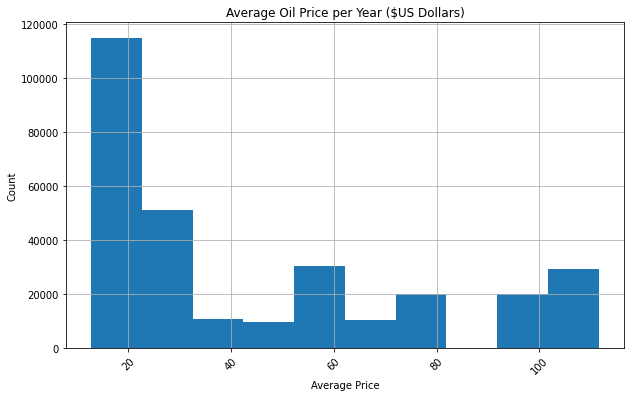

In [92]:
plt.subplots(figsize=(10, 6))

df1['Oil $ per Year'].hist(bins=10)
plt.xticks(rotation=45)
plt.title('Average Oil Price per Year ($US Dollars)')
plt.xlabel('Average Price')
plt.ylabel('Count');



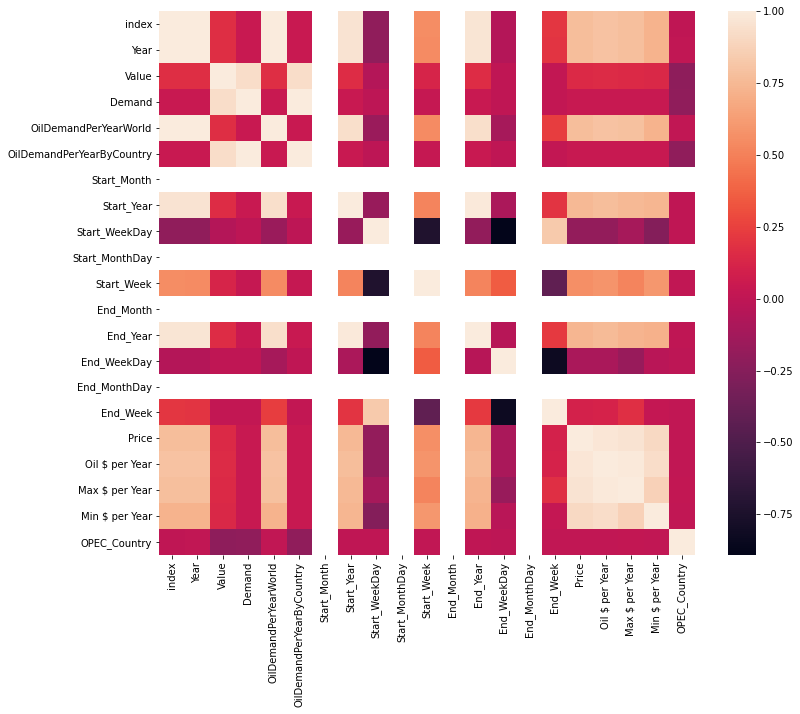

In [93]:
plt.subplots(figsize=(12,10))
sns.heatmap(df_avg.corr());

[Text(0.5, 1.0, 'Oil Price over the Years')]

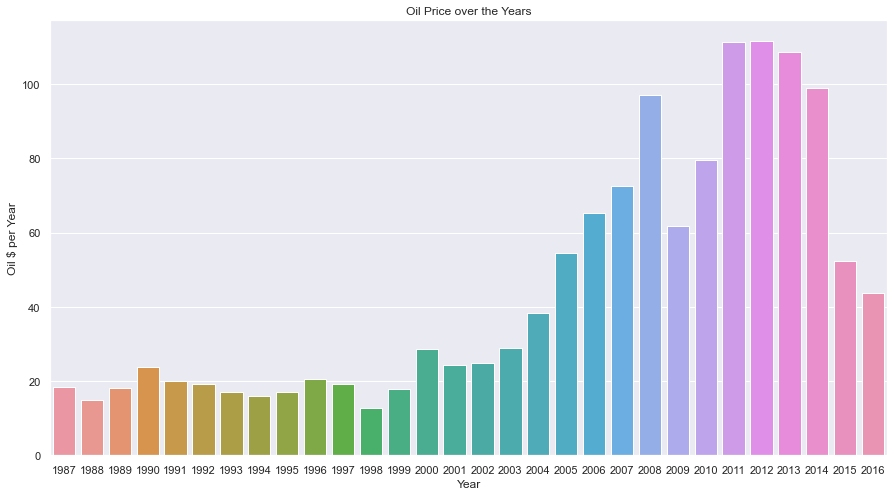

In [94]:
sns.set(rc={"figure.figsize":(15, 8)})
sns.barplot(data = df1
            ,x = 'Year'
            ,y = 'Oil $ per Year'
            ).set(title='Oil Price over the Years')

<AxesSubplot:xlabel='Year', ylabel='Value'>

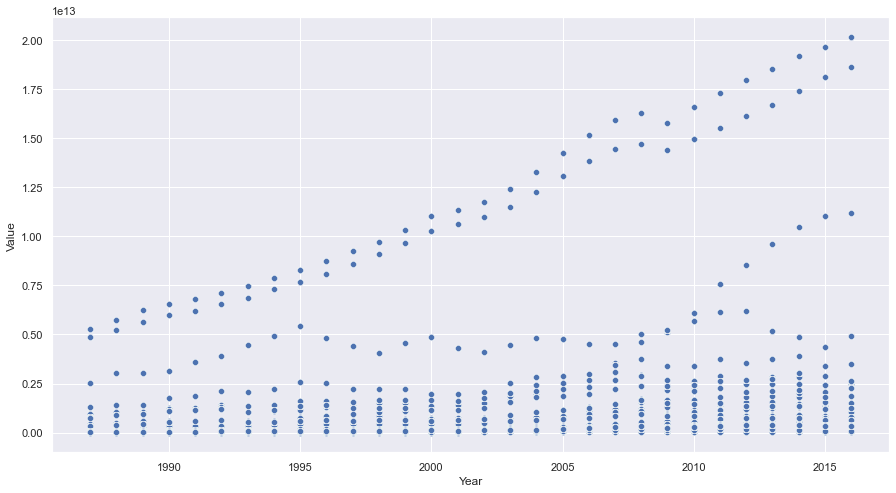

In [95]:
#display scatterplot
sns.scatterplot(data=df1, x="Year", y="Value")


In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297722 entries, 0 to 297721
Data columns (total 64 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   index                                297722 non-null  int64  
 1   Year                                 297722 non-null  int64  
 2   Value                                297722 non-null  float64
 3   Demand                               297722 non-null  int32  
 4   OilDemandPerYearWorld                297722 non-null  float64
 5   OilDemandPerYearByCountry            297722 non-null  float64
 6   Start_Month                          297722 non-null  int64  
 7   Start_Year                           297722 non-null  int64  
 8   Start_WeekDay                        297722 non-null  int64  
 9   Start_MonthDay                       297722 non-null  int64  
 10  Start_Week                           297722 non-null  UInt32 
 11  End_Month    

In [97]:
del df1['Start_Week']

In [98]:
del df1['End_Week']

In [99]:
from sklearn.linear_model import LinearRegression

C:\Users\mayra\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


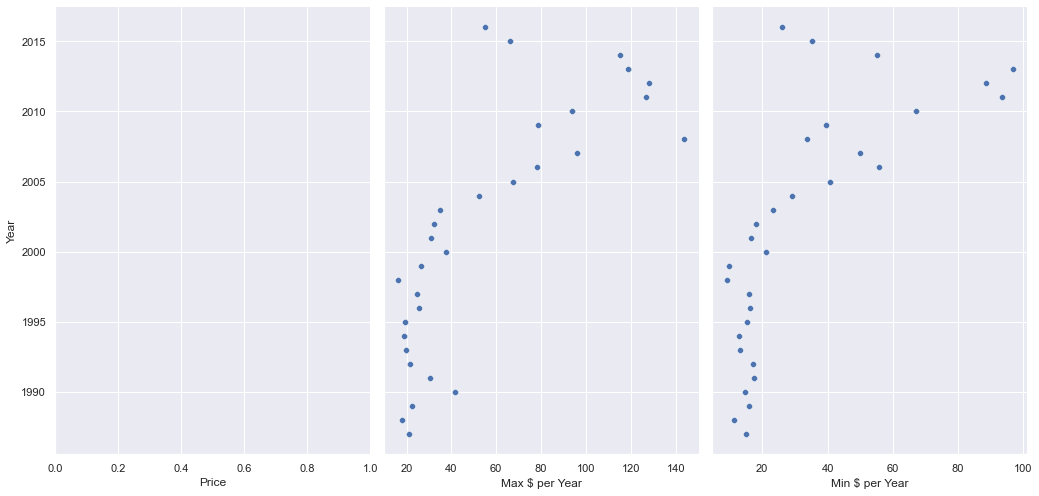

In [100]:
sns.pairplot(df1, x_vars=['Price','Max $ per Year','Min $ per Year'], y_vars='Year', size=7, aspect=0.7)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


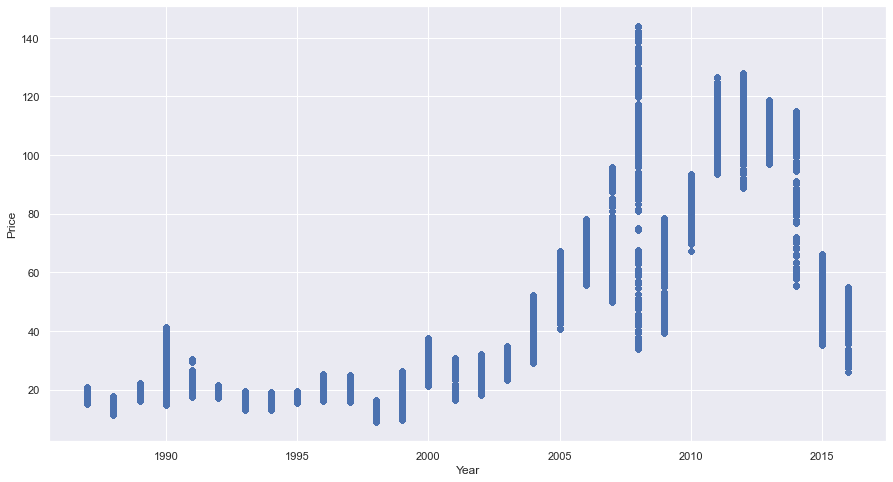

In [101]:
df1.plot(kind ='scatter',x='Year',y='Price')
plt.show()

In [102]:
df1.describe()

,index,Year,Value,Demand,OilDemandPerYearWorld,OilDemandPerYearByCountry,Start_Month,Start_Year,Start_WeekDay,Start_MonthDay,...,Country_Region_Spain,Country_Region_Syrian Arab Republic,Country_Region_Thailand,Country_Region_Tunisia,Country_Region_Ukraine,Country_Region_United Arab Emirates,Country_Region_United Kingdom,Country_Region_United States,political_party_Dem,political_party_Rep
count,297722.000000,297722.000000,2.977220e+05,297722.000000,297722.000000,297722.000000,297722.0,297722.000000,297722.000000,297722.0,...,297722.000000,297722.000000,297722.000000,297722.000000,297722.000000,297722.000000,297722.000000,297722.000000,297722.000000,297722.000000
mean,149683.500000,2001.744782,1.225904e+12,2007.430381,2583.120818,2007.430381,1.0,1998.355627,2.786378,20.0,...,0.025245,0.017620,0.025245,0.025245,0.025245,0.025245,0.025245,0.025245,0.537330,0.462670
std,85945.082759,8.465537,2.878279e+12,4365.499528,312.200116,4365.499528,0.0,8.172447,1.655329,0.0,...,0.156869,0.131568,0.156869,0.156869,0.156869,0.156869,0.156869,0.156869,0.498605,0.498605
min,823.000000,1987.000000,8.826597e+07,1.000000,2076.410000,1.000000,1.0,1981.000000,1.000000,20.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75253.250000,1994.000000,4.994646e+10,196.000000,2248.610000,196.000000,1.0,1993.000000,1.000000,20.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,149683.500000,2002.000000,1.926265e+11,505.000000,2552.590000,505.000000,1.0,2001.000000,2.000000,20.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,224113.750000,2009.000000,9.178699e+11,1815.000000,2841.970000,1815.000000,1.0,2009.000000,5.000000,20.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,298544.000000,2016.000000,2.016030e+13,23129.000000,3138.620000,23129.000000,1.0,2009.000000,5.000000,20.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns='Price'), 
                                                    df1['Price'], test_size=0.3, 
                                                    random_state=47)

In [104]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 7.018e+04
Date:                Sat, 16 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:42:55   Log-Likelihood:            -7.2770e+05
No. Observations:              208405   AIC:                         1.456e+06
Df Residuals:                  208354   BIC:                         1.456e+06
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
index                                3.014e-06   3.02e-06      0.997      0.319   -2.91e-06    8.94e-06
Year                                    0.0031      0.013      0.234      0.815      -0.023       0.029
Value                                2.737e-15   2.11e-14      0.130      0.897   -3.86e-14    4.41e-14
Demand                               6.592e-06   1.91e-05      0.346      0.730   -3.08e-05     4.4e-05
OilDemandPerYearWorld                  -0.0008      0.001     -0.976      0.329      -0.003       0.001
OilDemandPerYearByCountry             6.52e-06   1.91e-05      0.342      0.732   -3.09e-05    4.39e-05
Start_Month                          1.573e-05      0.000      0.140      0.889      -0.000       0.000
Start_Year                             -0.0034      0.018     -0.187      0.851      -0.039       0.032
Start_WeekDay                          -0.0266      0.031     -0.857      0.392      -0.088       0.034
Start_MonthDay                          0.0003      0.002      0.143      0.886      -0.004       0.005
End_Month                            1.609e-05      0.000      0.143      0.886      -0.000       0.000
End_Year                                0.0012      0.018      0.069      0.945      -0.034       0.036
End_WeekDay                            -0.0188      0.026     -0.710      0.478      -0.071       0.033
End_MonthDay                            0.0003      0.002      0.143      0.886      -0.004       0.005
Oil $ per Year                          0.9873      0.009    110.642      0.000       0.970       1.005
Max $ per Year                          0.0070      0.005      1.279      0.201      -0.004       0.018
Min $ per Year                          0.0051      0.004      1.378      0.168      -0.002       0.012
OPEC_Country                            0.0158      0.068      0.233      0.816      -0.117       0.148
Country_Region_Algeria                 -0.0156      0.105     -0.148      0.882      -0.222       0.191
Country_Region_Angola                   0.0028      0.106      0.027      0.979      -0.206       0.211
Country_Region_Argentina               -0.0483      0.124     -0.390      0.696      -0.291       0.194
Country_Region_Australia               -0.0144      0.118     -0.121      0.903      -0.246       0.218
Country_Region_Brazil                   0.0555      0.109      0.508      0.611      -0.159       0.270
Country_Region_Canada                  -0.0059      0.108     -0.054      0.957      -0.218       0.207
Country_Region_China                    0.0238      0.156      0.152      0.879      -0.283       0.330
Country_Region_Colombia                 0.0611      0.127      0.482      0.630      -0.187       0.310
Country_Region_Czech Republic           0.0153      0.133      0.11

In [105]:
#df2 = df1[['Price','OilDemandPerYearWorld', 'Start_WeekDay', 'End_WeekDay','Max $ per Year','Min $ per Year','Country_Region_Qatar','Country_Region_Thailand','Country_Region_Ukraine','political_party_Dem','political_party_Rep']].copy()
#df2.head()

In [106]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(pd.Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [107]:
final_iv, IV = data_vars(X_train, y_train)

In [108]:
features = list(IV[(IV['IV'] >= 0.01) & (IV['IV'] <= 0.8)]['VAR_NAME'])
X2 = X_train[features]
display(X2.shape)
X2.head()

(208405, 0)

""
78022
105725
250774
250110
115458


In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\mayra\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Features,VIF
5,OilDemandPerYearByCountry,6.928615e+14
3,Demand,7.443966e+13
35,Country_Region_Iraq,9.889332e+07
40,Country_Region_Libya,1.456939e+06
44,Country_Region_Nigeria,5.546165e+05
...,...,...
2,Value,1.213000e+01
6,Start_Month,0.000000e+00
13,End_MonthDay,0.000000e+00
9,Start_MonthDay,0.000000e+00


In [110]:
compression_opts = dict(method='zip',
                        archive_name='df1.csv')  
df1.to_csv('df1.zip', index=False,
          compression=compression_opts)  